In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [95]:
plt.style.use('dark_background')

In [39]:
ANNOT_ACTORS_PATH = "data/facescrub_actors.txt"
ANNOT_ACTRESS_PATH = "data/facescrub_actresses.txt"

ANNOT_PATH = "new_data/full_facescrub_with_ids.txt"
DATA_PATH = "new_data/"

## bbox
The coordinates of the bounding box for a face in the image. The format is x1,y1,x2,y2, where (x1,y1) is the coordinate of the top-left corner of the bounding box and (x2,y2) is that of the bottom-right corner, with (0,0) as the top-left corner of the image.  Assuming the image is represented as a Python Numpy array I, a face in I can be obtained as I[y1:y2, x1:x2].

In [40]:
from dataloader import FaceScrubDataset, SiameseFaceScrub, TripletFaceScrub

In [41]:
# class FaceScrubDataset(Dataset):
#     '''FaceScrub Dataset'''
    
#     def __init__(self, txt_file, root_dir, crop_face=True, transform=None):
#         """
#         Args:
#             txt_file (string): Path to the txt file with annotations
#             root_dit (string): Directory with all the images
#             crop_face (bool): To decide to get the cropped face or full image
#             transform (callable, optional): optional transform on a sample
#         """
#         self.faces_frame = pd.read_csv(txt_file, delimiter='\t')
#         self.root_dir = root_dir
#         self.transform = transform
#         self.crop_face = crop_face
    
#     def __len__(self):
#         return len(self.faces_frame)
    
#     def __getitem__(self, idx):
#         self.name = self.faces_frame.iloc[idx]['name']
#         self.img_id = self.faces_frame.iloc[idx]['image_id'].astype('str')
#         self.face_id = self.faces_frame.iloc[idx]['face_id'].astype('str')
#         self.gender = self.faces_frame.iloc[idx]['gender']
#         self.bbox = self.faces_frame.iloc[idx]['bbox']
#         self.bbox = list(map(int, self.bbox.split(',')))
        
#         if self.gender == 'male':
#             data_path = os.path.join(DATA_PATH, 'actor')
#         elif self.gender == 'female':
#             data_path = os.path.join(DATA_PATH, 'actress')
    
#         if self.crop_face:
#             img_name = self.name.replace(' ', '_') + '_' + self.img_id + '_' + self.face_id + '.jpeg'
#             img_path = os.path.join(data_path, 'faces', self.name.replace(' ', '_'), img_name)
#             img = io.imread(img_path)
#         else:
#             img_name = self.name.replace(' ', '_') + '_' + self.img_id + '.jpeg'
#             img_path = os.path.join(data_path, 'images', self.name.replace(' ', '_'), img_name)
#             img = io.imread(img_path)
        
#         sample = {'image': img, 'name': self.name, 'gender': self.gender, 
#                   'img_id': self.img_id, 'face_id': self.face_id}
        
#         if self.transform:
#             sample = self.transform(sample)
        
#         return sample         

0 Aaron Eckhart 1 male
1 Aaron Eckhart 2 male
2 Aaron Eckhart 3 male
3 Aaron Eckhart 4 male


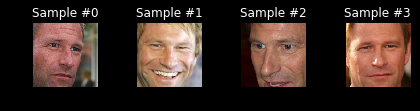

In [96]:
img_transforms = transforms.Compose([
    transforms.Resize(244), 
    transforms.RandomHorizontalFlip()
])
faces_dataset = FaceScrubDataset(txt_file=ANNOT_PATH, root_dir=DATA_PATH, transform=img_transforms)

fig = plt.figure()
for i in range(len(faces_dataset)):
    img, labels = faces_dataset[i]
    print(i, labels['name'], labels['face_id'], labels['gender'])
    
    ax = plt.subplot(1, 4, i+1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    ax.imshow(img)
    
    if i == 3:
        plt.show()
        break

0 Aaron Eckhart 1 male
0 Kris Kristofferson 38838 male
1 Aaron Eckhart 2 male
1 Simon Pegg 53512 male
2 Aaron Eckhart 3 male
2 Aaron Eckhart 211 male


/Users/var/anaconda/envs/fairness/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3 Aaron Eckhart 4 male
3 Aaron Eckhart 87 male


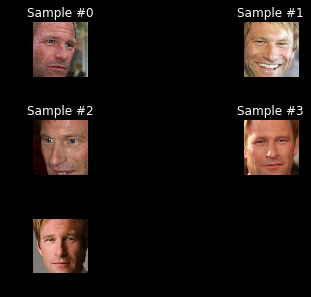

In [97]:
siamese_faces = SiameseFaceScrub(faces_dataset, train=True)

fig = plt.figure()
for i in range(len(siamese_faces)):
    (img1, img2), (labels1, labels2), target = siamese_faces[i]
    print(i, labels1['name'], labels1['face_id'], labels1['gender'])
    print(i, labels2['name'], labels2['face_id'], labels2['gender'])
    
    ax = plt.subplot(3, 2, i+1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    ax.imshow(img1)
    ax2 = plt.subplot(3, 2, i+2)
    ax2.axis('off')
    ax2.imshow(img2)
    
    if i == 3:
        plt.show()
        break

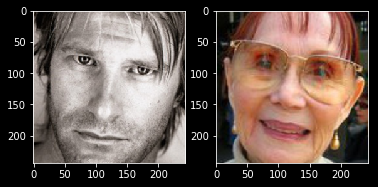

In [98]:
(img1, img2), (labels1, labels2), target = siamese_faces[20]
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

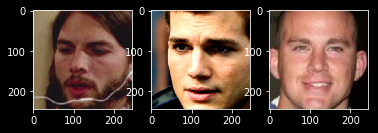

In [99]:
triplet_faces = TripletFaceScrub(faces_dataset, train=True)
(img1, img2, img3), (labels1, labels2, labels3)= triplet_faces[3000]
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)
plt.subplot(133)
plt.imshow(img3)

In [ ]:
# class Rescale(object):
#     '''
#     Rescale the image in a sample to a give size.
    
#     Args:
#         output_size (tuple or int): Desired output size. If tuple
#         output is matched to output_size. If int, smaller of 
#         image edges is matched to output_size keeping aspect 
#         ratio the same.
#     '''
    
#     def __init__(self, output_size):
#         assert isinstance(output_size, (int, tuple))
#         self.output_size = output_size
        
#     def __call__(self, sample):
#         image, name, img_id, face_id, gender = sample['image'], sample['name'], \
#             sample['img_id'], sample['face_id'], sample['gender']
        
#         h, w = image.shape[:2]
        
#         if isinstance(self.output_size, int):
#             if h > w:
#                 new_h, new_w = self.output_size * h / w, self.output_size
#             else:
#                 new_h, new_w = self.output_size, self.output_size * w / h
#         else:
#             new_h, new_w = self.output_size
        
#         new_h, new_w = int(new_h), int(new_w)
#         img = transform.resize(image, (new_h, new_w))
        
#         return {'image': img, 'name': name, 'img_id': img_id, 
#                 'face_id': face_id, 'gender': gender}

In [ ]:
# class ToTensor(object):
#     """Convert ndarrays in sample to Tensors."""
    
#     def __call__(self, sample):
#         image, name, img_id, face_id, gender = sample['image'], sample['name'], \
#                     sample['img_id'], sample['face_id'], sample['gender']        
#         # swap color axis because 
#         # numpy image: HxWxC
#         # torch image: CxHxW
#         image = image.transpose((2, 0, 1))
#         return {'image': torch.from_numpy(image), 'name': name, 
#                 'img_id': img_id, 'face_id': face_id, 'gender': gender}

In [ ]:
scale = Rescale(128)

fig = plt.figure()
sample = faces_dataset[8]
transformed_sample = scale(sample)

plt.subplot(121)
plt.title('Before rescale\nsize:{}'.format(sample['image'].shape))
plt.imshow(sample['image'])
plt.subplot(122)
plt.title('After rescale\nsize:{}'.format(transformed_sample['image'].shape))
plt.imshow(transformed_sample['image'])
plt.show()

In [ ]:
transformed_faces_dataset = FaceScrubDataset(txt_file=ANNOT_PATH, 
                                              root_dir=DATA_PATH, 
                                              transform = transforms.Compose([
                                                  Rescale(256), 
                                                  ToTensor()
                                              ]))


for i in range(len(transformed_faces_dataset)):
    sample = transformed_faces_dataset[i]

    print(i, sample['image'].size(), sample['name'], sample['face_id'])
    
    if i == 3:
        break

In [ ]:
dataloader = DataLoader(transformed_faces_dataset, batch_size=4, shuffle=True, num_workers=4)

def show_images_batch(sample_batched):
    """Show a batch of samples"""
    
    images_batch, names_batch = sample_batched['image'], sample_batched['name']
    face_id_batch, gender_batch = sample_batched['face_id'], sample_batched['gender']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    
    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(), 
         sample_batched['name'])
    
    plt.figure()
    show_images_batch(sample_batched)
    plt.axis('off')
    plt.ioff()
    plt.show()
    
    if i_batch == 3:    
        break